In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day31-power-transformer/concrete_data.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
x = df.drop(columns = ['Strength'])
y = df.iloc[:,-1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [10]:
#applying regression wihtout any transformation
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.6275531792314851

In [11]:
#Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring = 'r2'))

np.float64(0.4609940491662865)

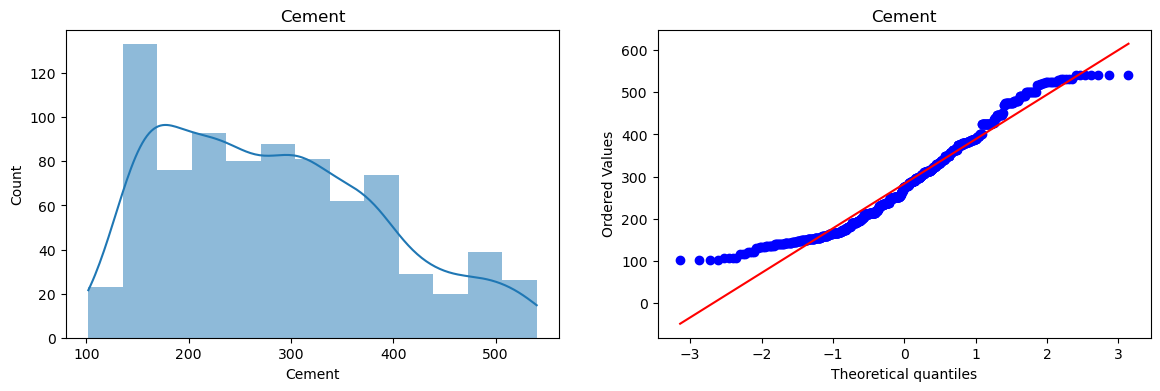

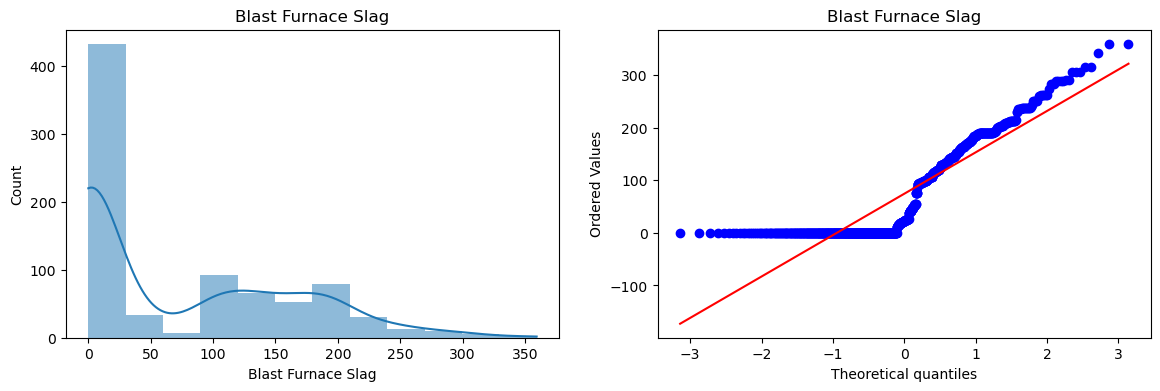

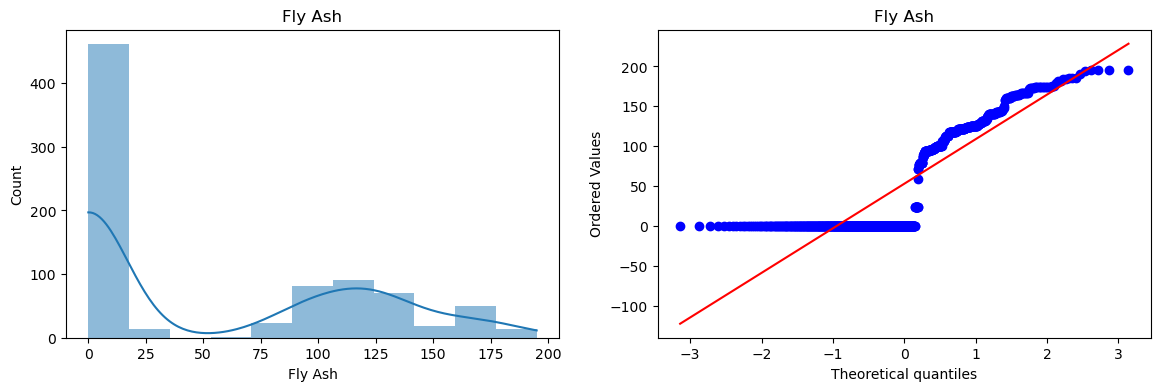

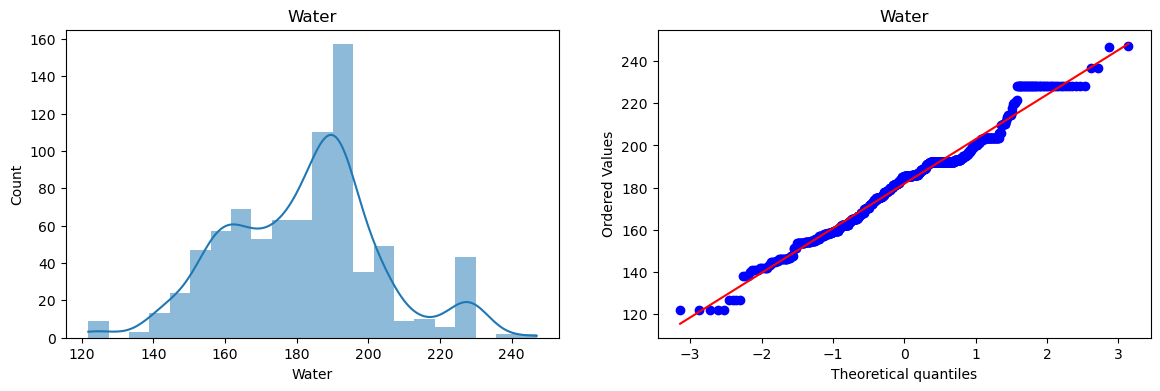

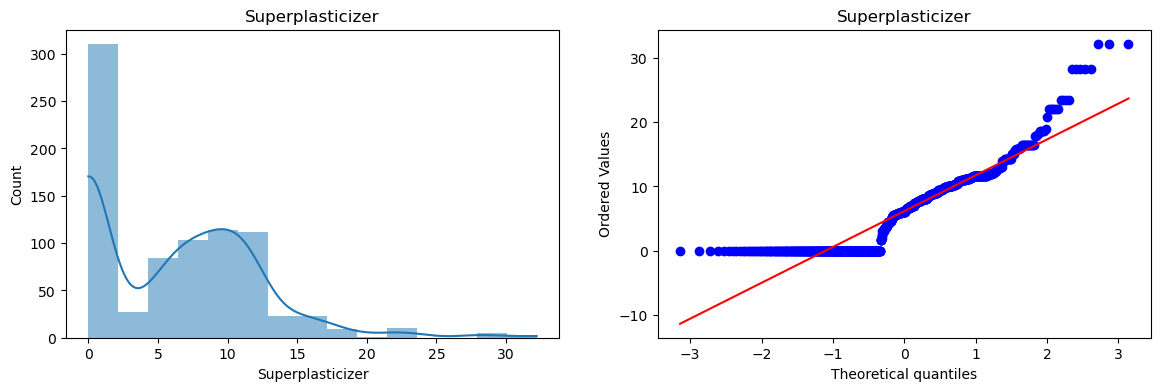

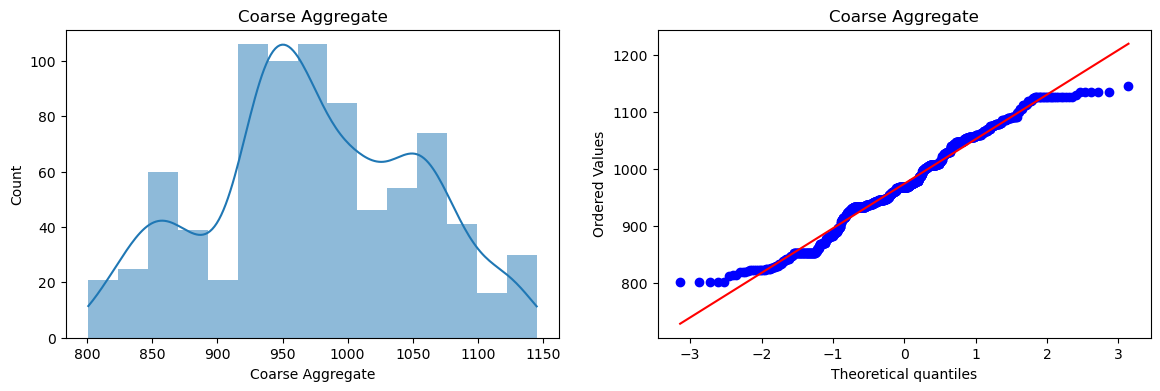

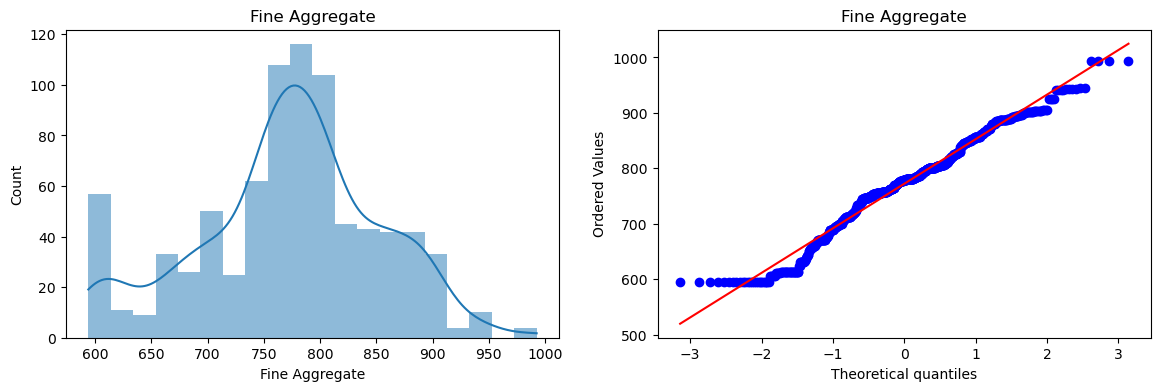

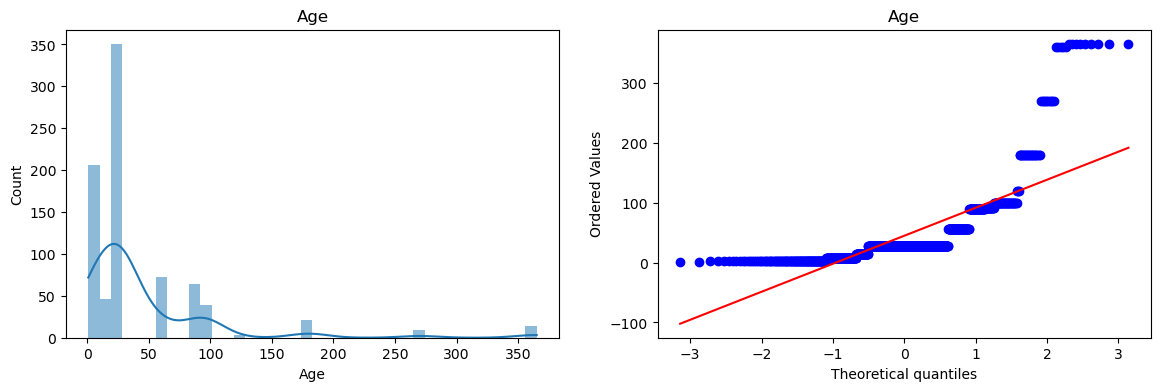

In [14]:
# plotting the distplots without any transformation

for col in x_train.columns :
    plt.figure(figsize =(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde = True, linewidth = 0)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col],dist = 'norm',plot = plt)
    plt.title(col)

    plt.show()

In [16]:
# applying Box -Cox Transform

pt = PowerTransformer(method = 'box-cox')

x_train_transformed = pt.fit_transform(x_train + 0.000001)
x_test_transformed = pt.transform(x_test + 0.000001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas' : pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [17]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

y_pred2 = lr.predict(x_test_transformed)

r2_score(y_test,y_pred2)

0.8047825011028631

In [18]:
# Using cross val score

pt = PowerTransformer(method = 'box-cox')
x_transformed = pt.fit_transform(x+ 0.00000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring = 'r2'))

np.float64(0.6654921098398183)

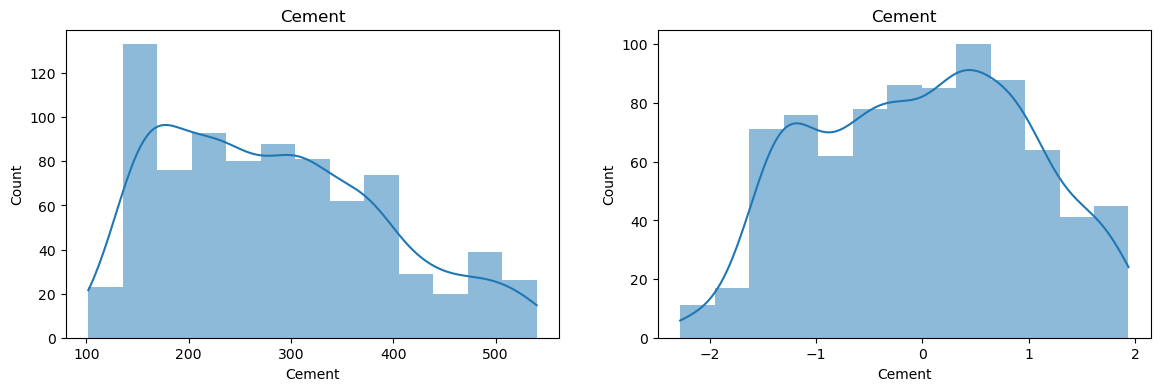

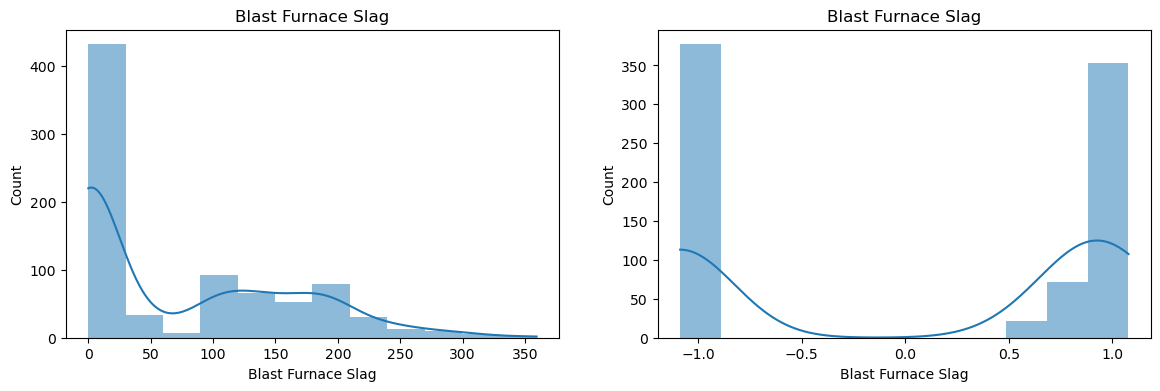

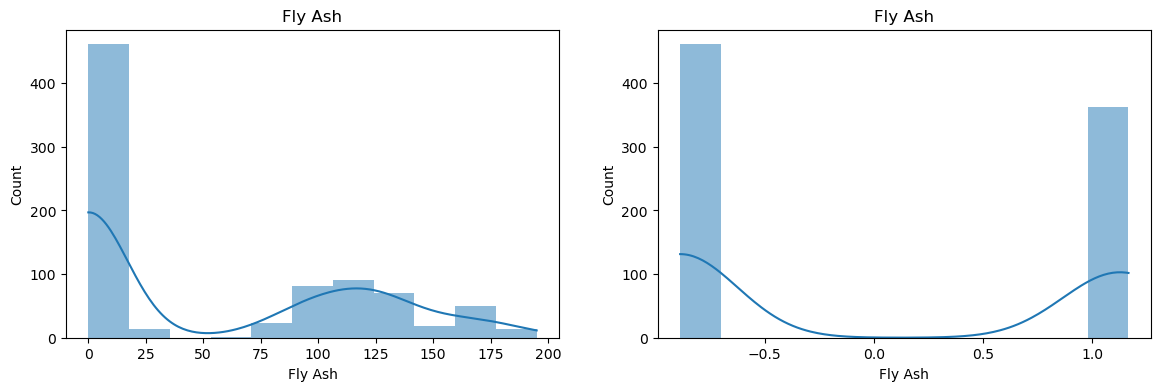

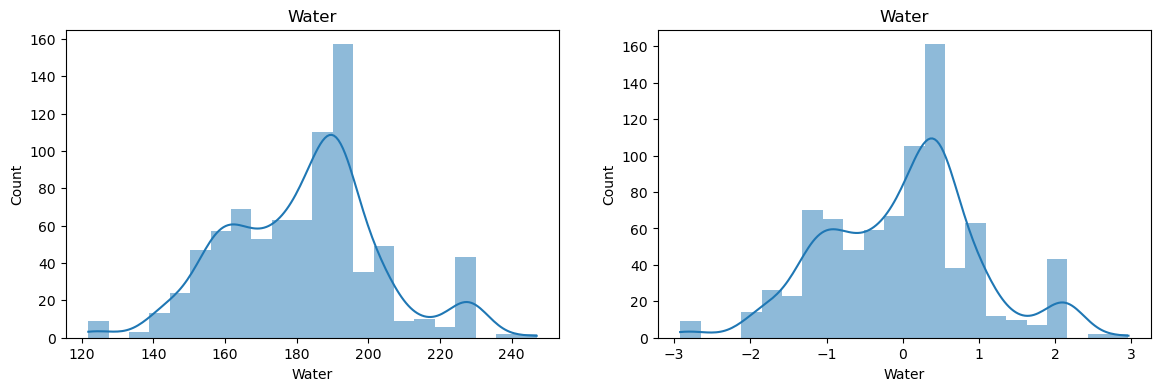

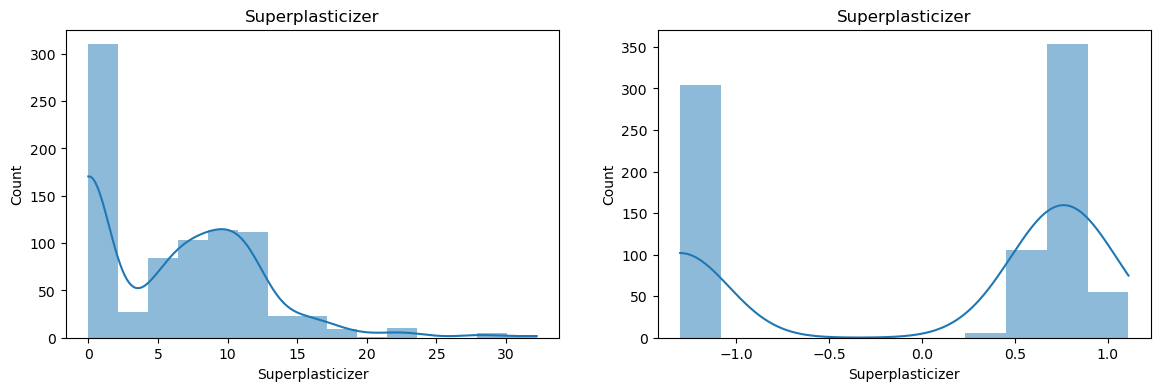

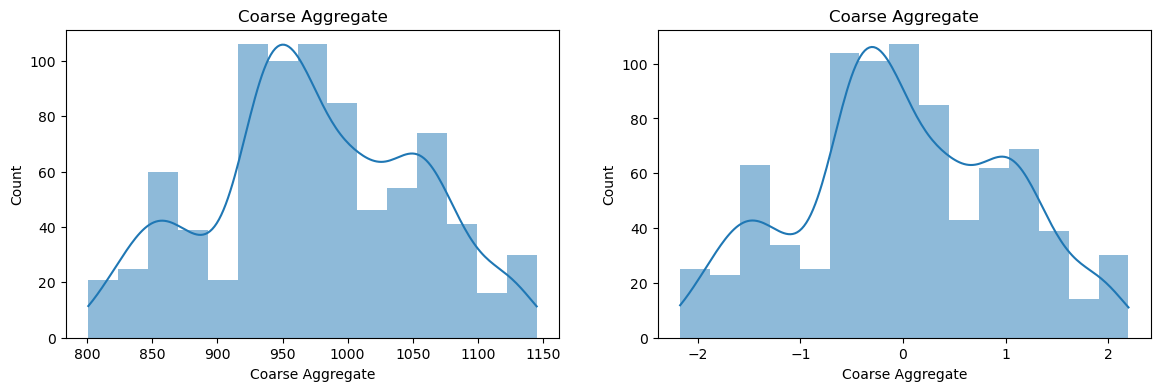

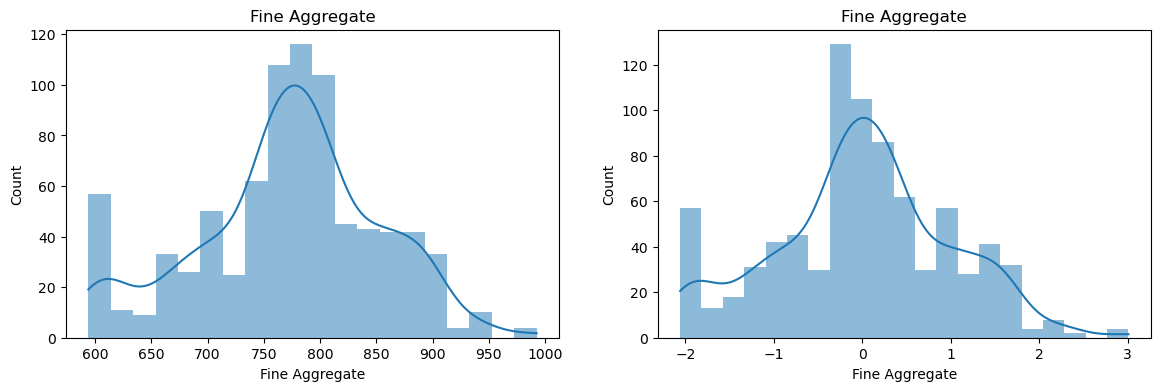

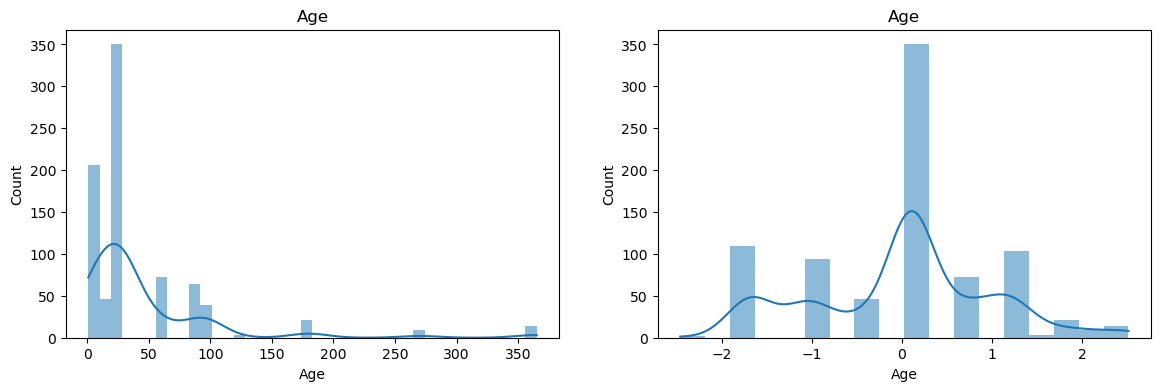

In [20]:
#Before and after comparison for Box-Cox Plot

x_train_transformed = pd.DataFrame(x_train_transformed,columns = x_train.columns)

for col in x_train_transformed.columns :
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde = True, linewidth = 0)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed[col],kde = True,linewidth = 0)
    plt.title(col)

    plt.show()

In [21]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)

y_pred3 = lr.predict(x_test_transformed2)
print(r2_score(y_test,y_pred3))

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':x_train.columns,'Yeo_johnson_lambdas':pt1.lambdas_})

0.8161906513339304
0.8161906513339304


,cols,Yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [22]:
#applying cross val score

pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2, y,scoring = 'r2'))

np.float64(0.6834625141500863)

In [23]:
x_train_transformed2 = pd.DataFrame(x_train_transformed2,columns=x_train.columns)

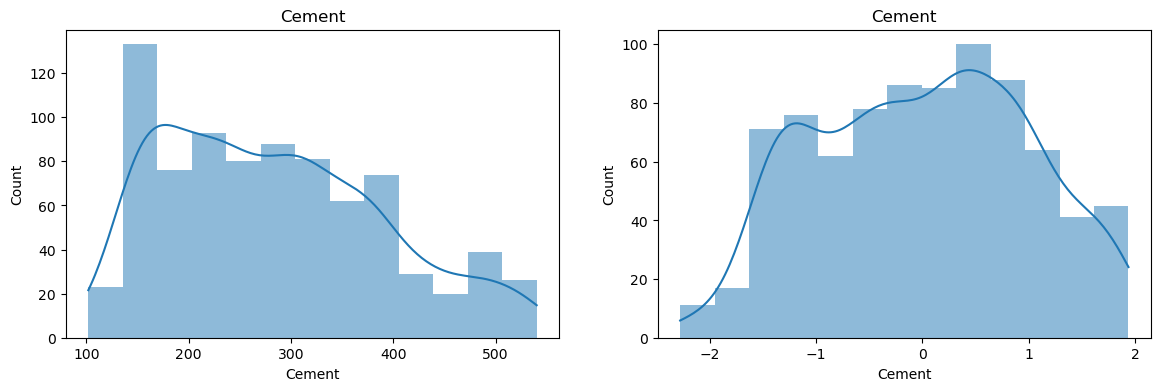

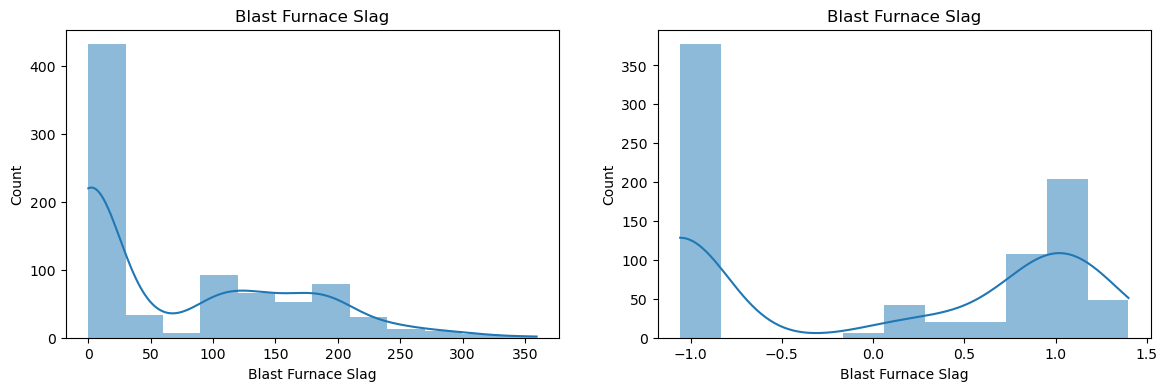

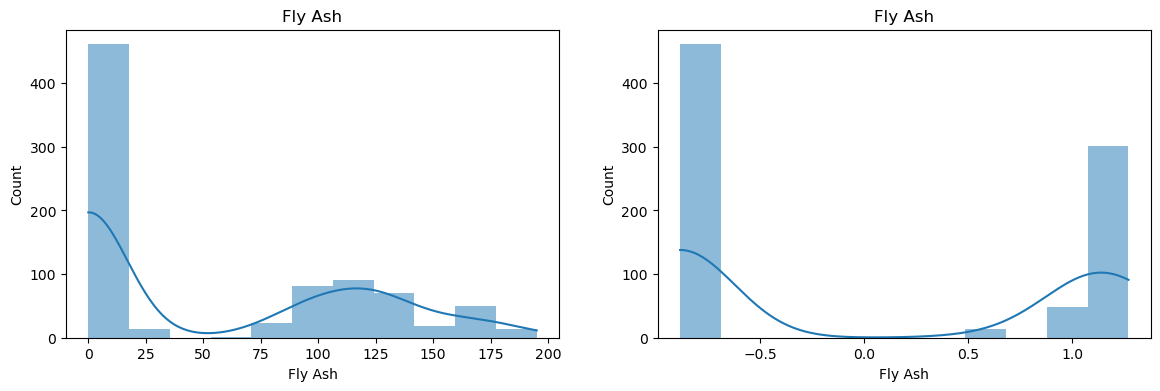

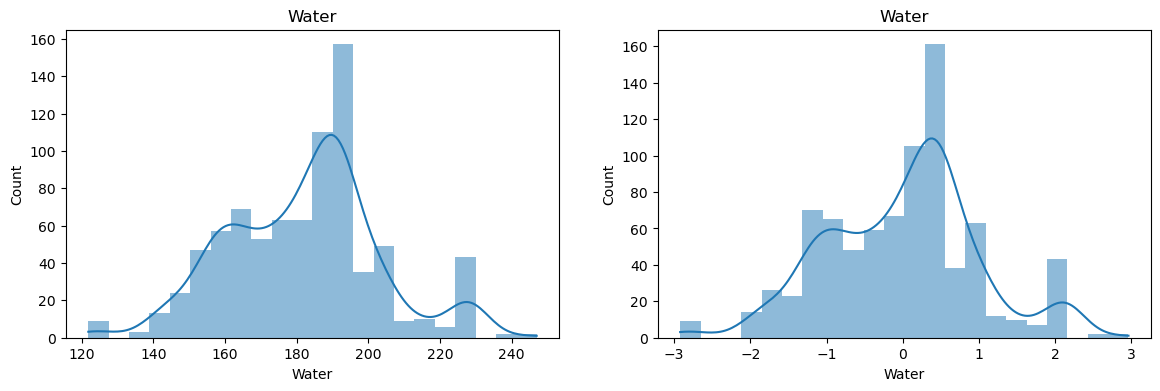

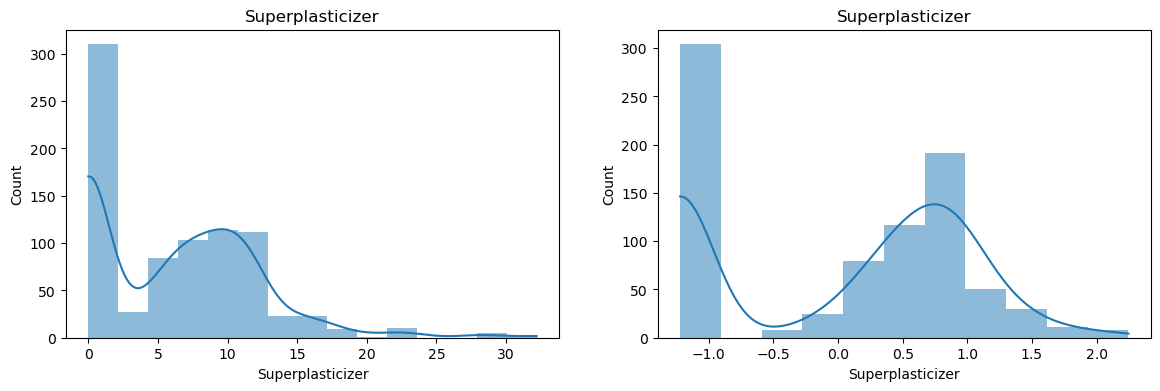

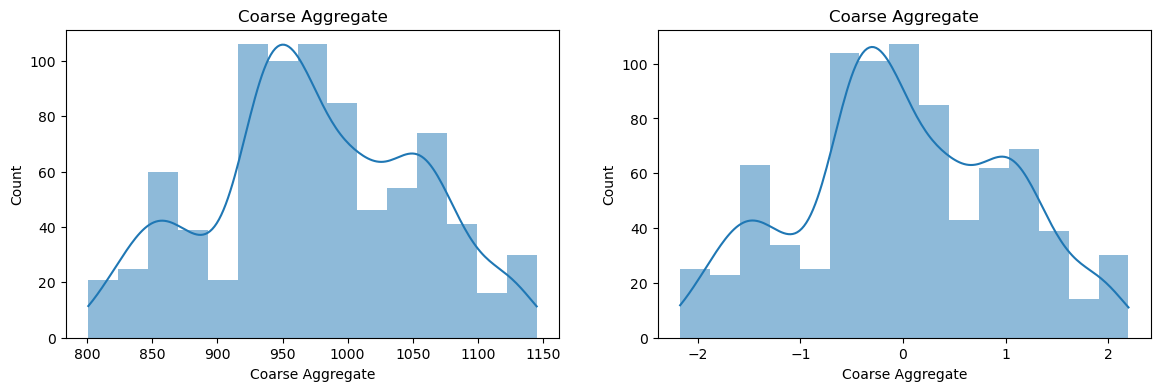

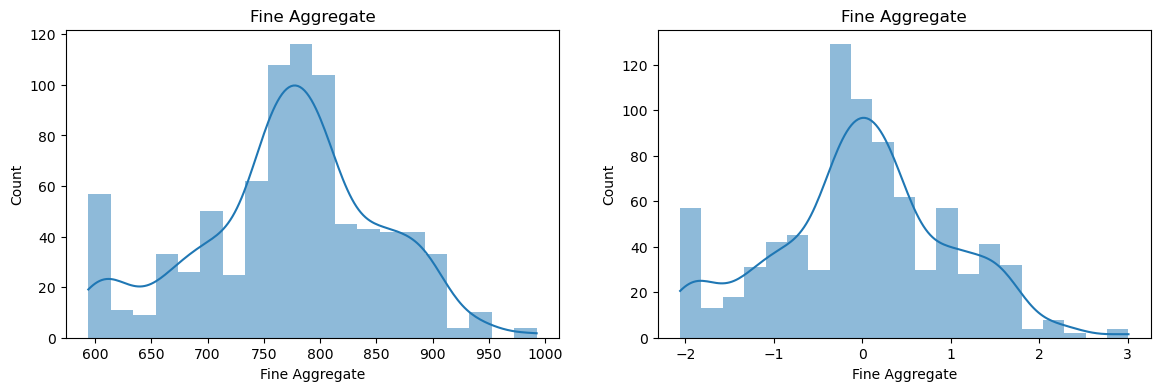

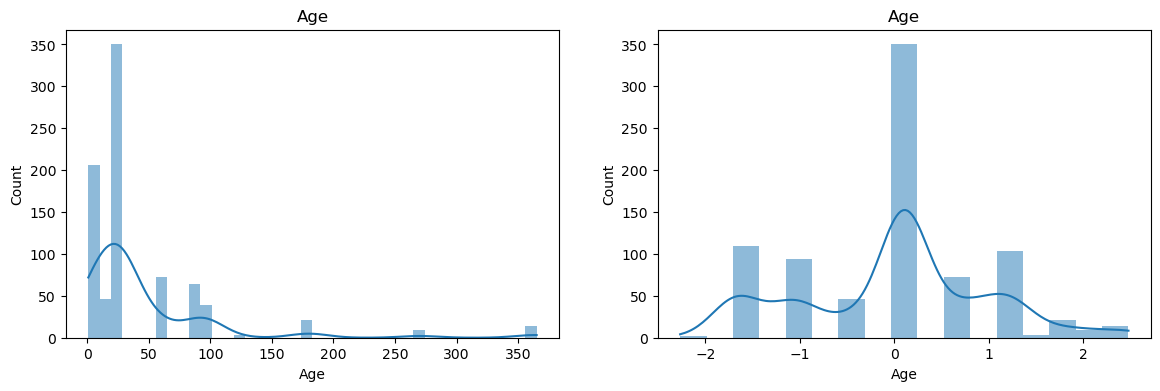

In [24]:
#Before and after comparison for yeo-johnson

for col in x_train_transformed2.columns :
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    sns.histplot(x_train[col],kde = True, linewidth = 0)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed2[col],kde = True, linewidth = 0)
    plt.title(col)

    plt.show()

In [26]:
#side by side lambdas 
pd.DataFrame({'cols' : x_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885


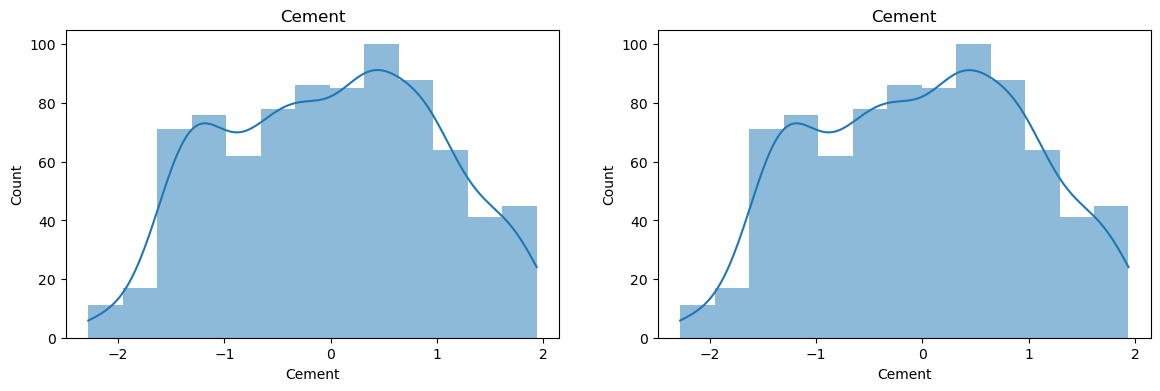

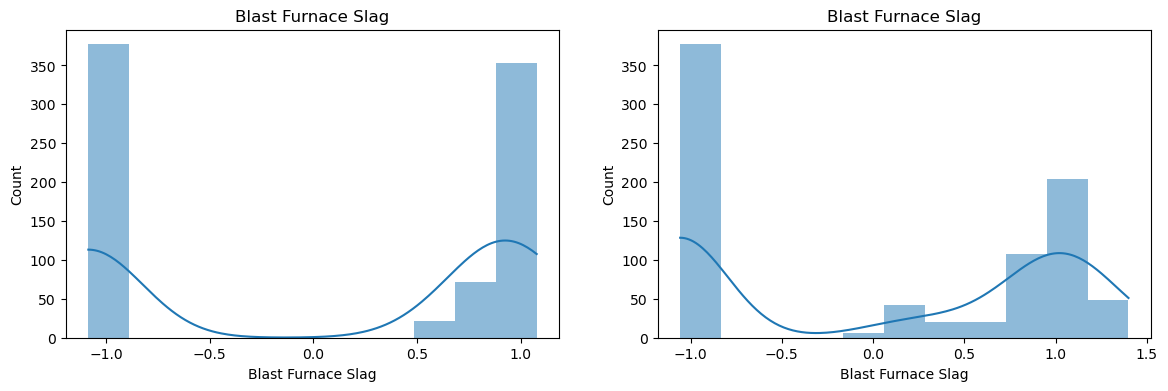

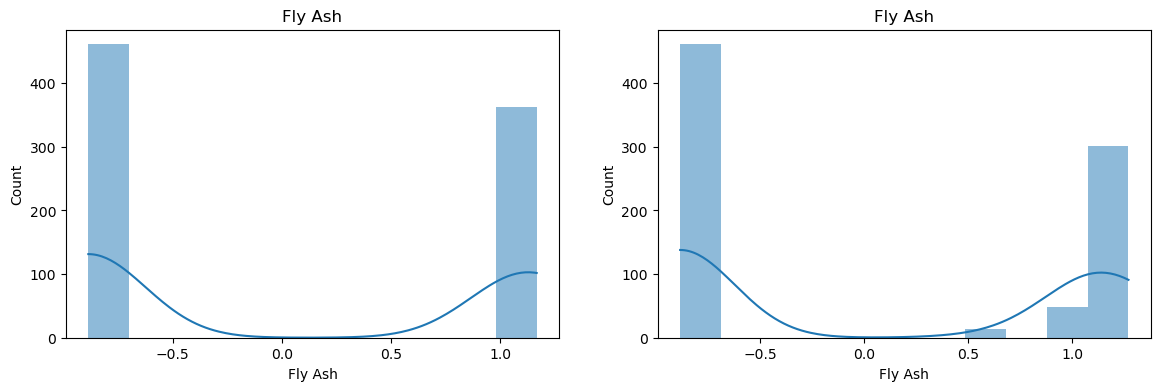

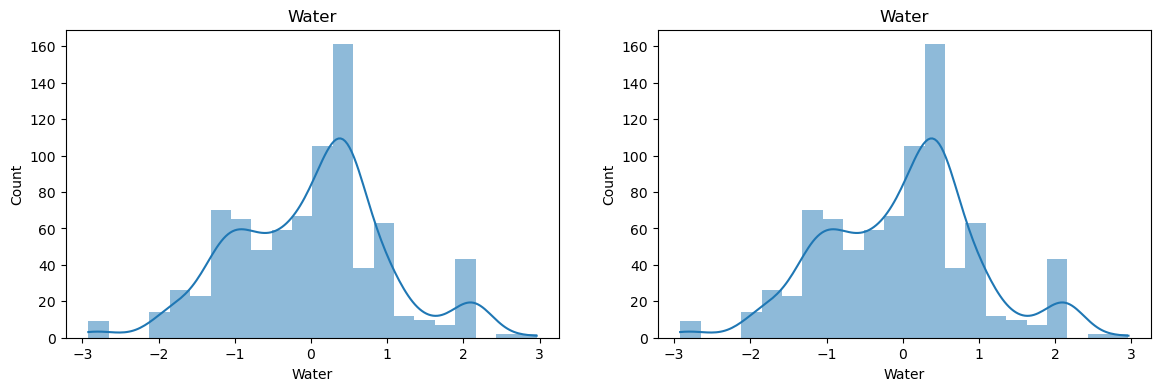

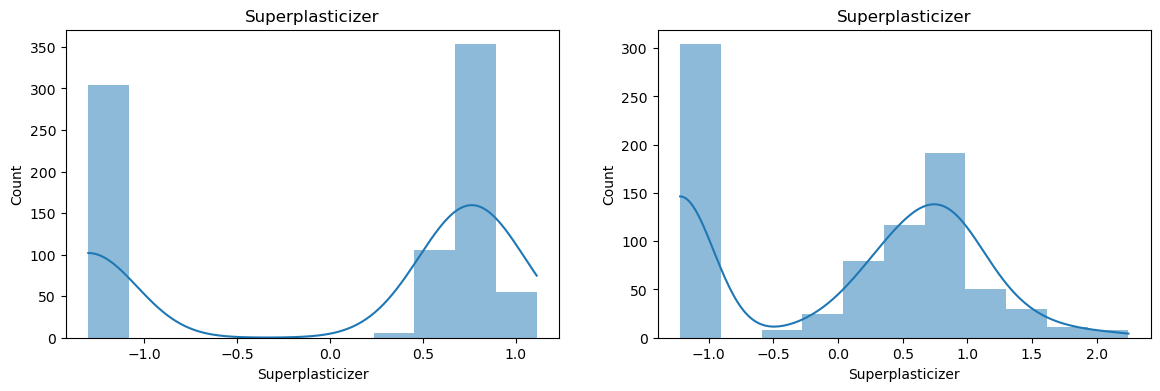

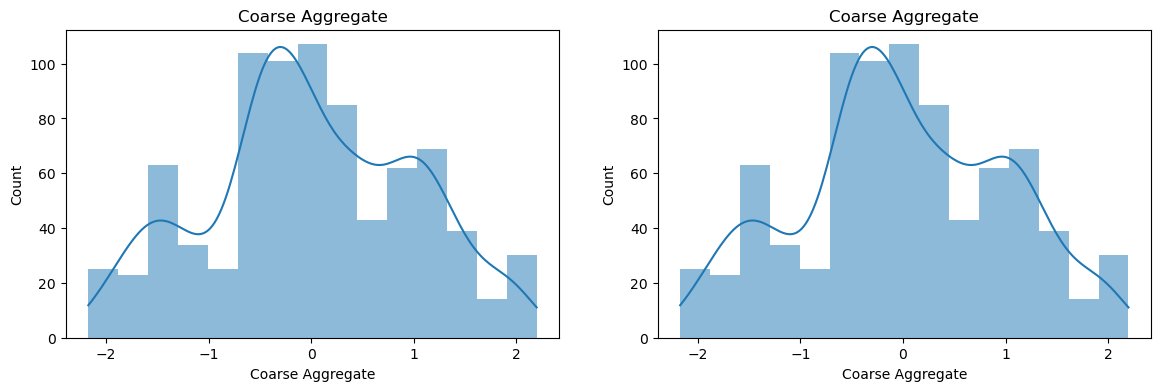

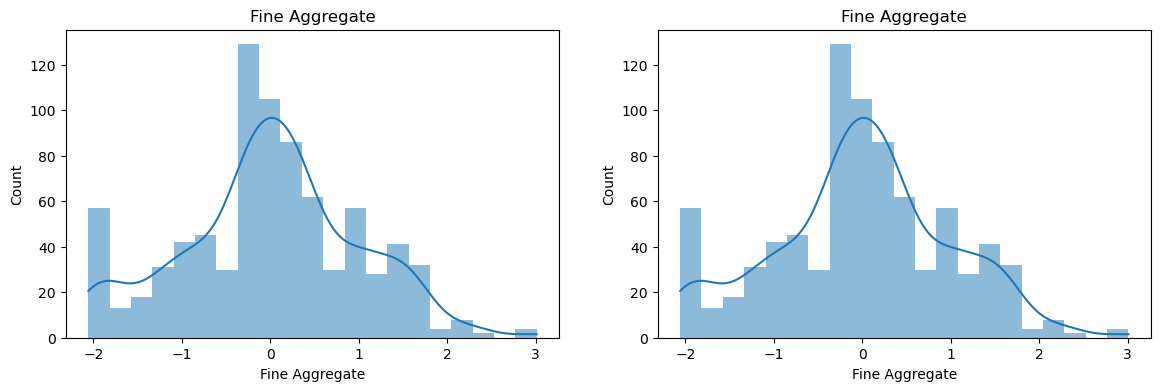

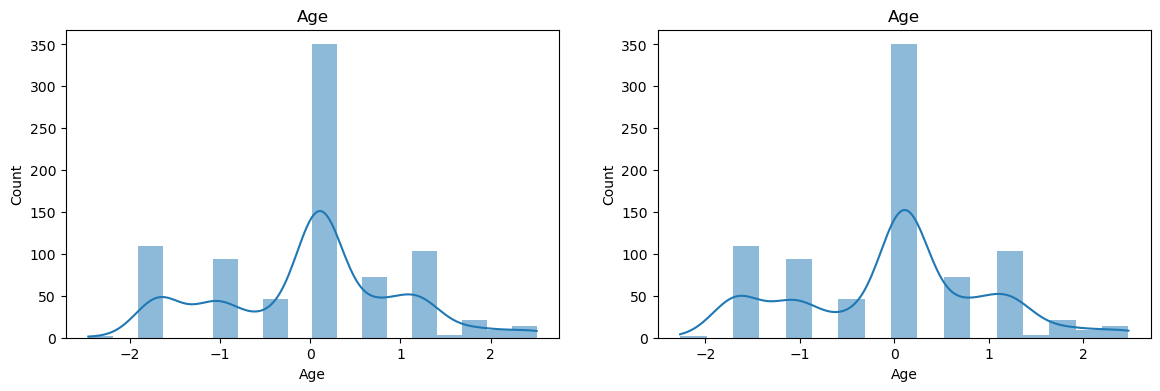

In [27]:
for col in x_train_transformed.columns :
    plt.figure(figsize = (14,4))
    plt.subplot(121)

    sns.histplot(x_train_transformed[col],kde = True, linewidth = 0)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed2[col],kde = True, linewidth = 0)
    plt.title(col)

    plt.show()